**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [578]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 109MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [579]:
df=pd.read_csv('/content/nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [580]:
df.shape

(1340, 21)

**What are the columns?**

In [581]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [583]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [585]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [586]:
df.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [587]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [588]:
df_features=df.drop('Name', axis=1)
df_features=df_features.drop('TARGET_5Yrs', axis=1)
df_labels = df['TARGET_5Yrs']

In [589]:
print("The shape of the features dataframe is: ", df_features.shape)
print("The shape of the labels dataframe is: ", df_labels.shape)

The shape of the features dataframe is:  (1329, 19)
The shape of the labels dataframe is:  (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [590]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [591]:
df_features_train, df_features_test = train_test_split(df_features, test_size=0.2, random_state=42)
df_label_train, df_label_test = train_test_split(df_labels, test_size=0.2, random_state=42)

In [592]:
print("The shape of training features dataframe is:",df_features_train.shape)
print("The shape of testing features dataframe is:",df_features_test.shape)
print("The shape of training labels dataframe is:",df_label_train.shape)
print("The shape of test labels dataframe is:",df_label_test.shape)

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [593]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [594]:
model = LogisticRegression()
model.fit(df_features_train, df_label_train)

LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy: Is the ratio of correctly predicted observations to the total observations. Accuracy = (TP + TN) / (TP + TN + FP + FN)

- F1 score: Harmonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

- Precision: Is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision = TP / (TP + FP)

- Recall: Is the ratio of correctly predicted positive observations to all actual positives. Recall = TP / (TP + FN)

Where:  
- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

1.   List item
2.   List item



All of these can be calculated for our model using sklearn modules.

**Import them!**

In [595]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Now test on the testing dataframe and print all of these metrics.**

In [596]:
y_pred = model.predict(df_features_test)

In [597]:
accuracy = accuracy_score(df_label_test, y_pred)
precision = precision_score(df_label_test, y_pred, average='binary')
recall = recall_score(df_label_test, y_pred, average='binary')
f1 = f1_score(df_label_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7518796992481203
Precision: 0.8089887640449438
Recall: 0.8181818181818182
F1 Score: 0.8135593220338984


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [598]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [599]:
model = SVC()
model.fit(df_features_train, df_label_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [600]:
y_pred = model.predict(df_features_test)

In [601]:
accuracy = accuracy_score(df_label_test, y_pred)
precision = precision_score(df_label_test, y_pred, average='binary')
recall = recall_score(df_label_test, y_pred, average='binary')
f1 = f1_score(df_label_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7443609022556391
Precision: 0.7872340425531915
Recall: 0.8409090909090909
F1 Score: 0.8131868131868132


### MULTICLASS CLASSIFICATION

In [ ]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 54.7MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [602]:
df=pd.read_csv('/content/social_well_being.csv')

**Always analyse the data.**

In [603]:
df.shape

(924, 10)

In [604]:
df.describe()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,498.937229,27.500000,96.309524,3.349567,40.246753,15.726190,22.595238
std,291.713692,3.941473,39.228274,1.940080,26.799196,8.933589,8.634295
min,1.000000,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,231.750000,24.000000,65.000000,2.000000,19.500000,8.000000,17.000000
50%,500.500000,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,731.250000,30.000000,120.000000,5.000000,55.000000,22.000000,28.000000
max,1000.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [606]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [607]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [608]:
print("The classes are:",df['Dominant_Emotion'].unique())

The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [609]:
print("The genders are:",df['Gender'].unique())
print("The platforms used are:",df['Platform'].unique())

The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [610]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [611]:
categorical_columns = ['Gender']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_encoded = one_hot_encoded.astype(int)
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, one_hot_df], axis=1)
df = df.drop(categorical_columns, axis=1)

In [612]:
df

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [613]:
categorical_columns = ['Platform']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_encoded = one_hot_encoded.astype(int)
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, one_hot_df], axis=1)
df = df.drop(categorical_columns, axis=1)

In [614]:
df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [615]:
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [616]:
le = LabelEncoder()
df['Dominant_Emotion_Encoded'] = le.fit_transform(df['Dominant_Emotion'])
df.drop('Dominant_Emotion', axis=1, inplace=True)

In [617]:
df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [619]:
df_features=df.drop('Dominant_Emotion_Encoded', axis=1)
df_features=df_features.drop('User_ID', axis=1)
df_label = df['Dominant_Emotion_Encoded']

In [620]:
df_features_train, df_features_test = train_test_split(df_features, test_size=0.2, random_state=42)
df_label_train, df_label_test = train_test_split(df_label, test_size=0.2, random_state=42)

In [621]:
print("The shape of training features dataframe is:",df_features_train.shape)
print("The shape of testing features dataframe is:",df_features_test.shape)
print("The shape of training labels dataframe is:",df_label_train.shape)
print("The shape of test labels dataframe is:",df_label_test.shape)

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)


**Import the module used for training a KNN model.**

In [623]:
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [624]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(df_features_train, df_label_train)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [625]:
y_pred = knn_model.predict(df_features_test)

In [626]:
prediction_df = pd.DataFrame({
    'Actual': df_label_test,
    'Predicted': y_pred
})

print(prediction_df)

     Actual  Predicted
323       0          0
861       0          0
30        2          2
837       3          3
294       4          4
..      ...        ...
54        1          2
827       1          1
490       0          0
753       5          5
843       3          3

[185 rows x 2 columns]


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [627]:
y_pred_labels = le.inverse_transform(y_pred)

In [628]:
print(y_pred_labels)

['Anger' 'Anger' 'Boredom' 'Happiness' 'Neutral' 'Anxiety' 'Neutral'
 'Anxiety' 'Neutral' 'Boredom' 'Neutral' 'Neutral' 'Boredom' 'Happiness'
 'Anxiety' 'Anxiety' 'Anxiety' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Boredom' 'Neutral' 'Happiness' 'Boredom' 'Neutral' 'Anger' 'Anxiety'
 'Anger' 'Neutral' 'Anxiety' 'Sadness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Anger' 'Happiness' 'Sadness' 'Anxiety' 'Anger' 'Anger'
 'Sadness' 'Neutral' 'Happiness' 'Neutral' 'Neutral' 'Anger' 'Happiness'
 'Boredom' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Happiness' 'Anger'
 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Happiness' 'Happiness' 'Happiness' 'Anxiety' 'Neutral'
 'Happiness' 'Neutral' 'Boredom' 'Boredom' 'Anxiety' 'Neutral' 'Happiness'
 'Neutral' 'Happiness' 'Anger' 'Sadness' 'Sadness' 'Neutral' 'Sadness'
 'Anger' 'Happiness' 'Happiness' 'Anger' 'Anger' 'Sadness' 'Happiness'
 'Anxiety' 'Neutral' 'Anger' 'Sadness' 'Neutral' 'Happiness' 'Happiness'
 'Sa

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [629]:
accuracy = accuracy_score(df_label_test, y_pred)

In [630]:
print("Accuracy of the model is:", accuracy)

Accuracy of the model is: 0.9891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [631]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(df_label_test, y_pred))

print("\nClassification Report:")
print(classification_report(df_label_test, y_pred))

Confusion Matrix:
[[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  1  0 42  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      0.97      0.97        35
           2       0.95      1.00      0.97        18
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [632]:
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [633]:
nb_model = GaussianNB()
nb_model.fit(df_features_train, df_label_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [634]:
y_pred = nb_model.predict(df_features_test)
y_pred_label = le.inverse_transform(y_pred)
print(y_pred_label)

['Anger' 'Anger' 'Boredom' 'Happiness' 'Anger' 'Happiness' 'Boredom'
 'Anger' 'Anger' 'Boredom' 'Anger' 'Anger' 'Anger' 'Happiness' 'Anger'
 'Boredom' 'Boredom' 'Boredom' 'Anger' 'Anger' 'Happiness' 'Boredom'
 'Boredom' 'Happiness' 'Boredom' 'Happiness' 'Anger' 'Anger' 'Anger'
 'Boredom' 'Happiness' 'Sadness' 'Anger' 'Happiness' 'Anger' 'Happiness'
 'Anger' 'Happiness' 'Anger' 'Boredom' 'Anger' 'Anger' 'Anger' 'Boredom'
 'Happiness' 'Boredom' 'Boredom' 'Anger' 'Happiness' 'Boredom' 'Sadness'
 'Happiness' 'Happiness' 'Sadness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Boredom' 'Happiness' 'Anger'
 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Boredom' 'Happiness'
 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness' 'Boredom' 'Happiness'
 'Anger' 'Happiness' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Happiness' 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness' 'Sadness'
 'Boredom' 'Anger' 'Sadness' 'Boredom' 'Happiness' 'Happiness' 'Boredom'
 'Happines

**Finally, print the accuracy, confusion matrix and classification report.**

In [635]:
accuracy = accuracy_score(df_label_test, y_pred)
print("Accuracy of the model is:", accuracy)

Accuracy of the model is: 0.42702702702702705


In [636]:
print("Confusion Matrix:")
print(confusion_matrix(df_label_test, y_pred))

print("\nClassification Report:")
print(classification_report(df_label_test, y_pred))

Confusion Matrix:
[[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.79      0.49        29
           1       0.00      0.00      0.00        35
           2       0.26      0.78      0.39        18
           3       0.63      0.86      0.73        43
           4       0.00      0.00      0.00        35
           5       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [637]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(df_features_train, df_label_train)
y_pred = dt_model.predict(df_features_test)
accuracy = accuracy_score(df_label_test, y_pred)
print("Accuracy of the model is:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(df_label_test, y_pred))

print("\nClassification Report:")
print(classification_report(df_label_test, y_pred))

Accuracy of the model is: 0.9621621621621622

Confusion Matrix:
[[29  0  0  0  0  0]
 [ 0 34  0  0  1  0]
 [ 0  1 16  0  0  1]
 [ 0  0  0 43  0  0]
 [ 0  1  0  0 34  0]
 [ 1  1  0  0  1 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.92      0.97      0.94        35
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        43
           4       0.94      0.97      0.96        35
           5       0.96      0.88      0.92        25

    accuracy                           0.96       185
   macro avg       0.96      0.95      0.96       185
weighted avg       0.96      0.96      0.96       185



In [638]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df_features_train, df_label_train)
y_pred = rf_model.predict(df_features_test)
accuracy = accuracy_score(df_label_test, y_pred)
print("Accuracy of the model is:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(df_label_test, y_pred))

print("\nClassification Report:")
print(classification_report(df_label_test, y_pred))

Accuracy of the model is: 1.0

Confusion Matrix:
[[29  0  0  0  0  0]
 [ 0 35  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  0 43  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        25

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [639]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [640]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [641]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

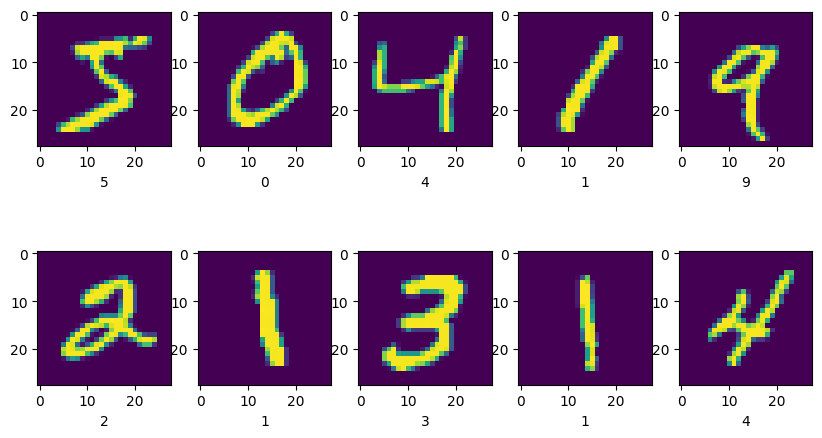

In [ ]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [642]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    return np.maximum(0, Z)
    pass

  def softmax(self, Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    pass

  def forward_propagation(self, X):
    self.activations = {}
    A = X.T
    self.activations['A0'] = A

    for i in range(1, self.num_layers + 1):
        Z = A @ self.weights_biases[f'W{i}'].T + self.weights_biases[f'b{i}'].T
        A = self.RELU(Z)
        self.activations[f'Z{i}'] = Z
        self.activations[f'A{i}'] = A

    Z = A @ self.weights_biases[f'W{self.num_layers + 1}'].T + self.weights_biases[f'b{self.num_layers + 1}'].T
    A = self.softmax(Z)
    self.activations[f'Z{self.num_layers + 1}'] = Z
    self.activations[f'A{self.num_layers + 1}'] = A

    return A, self.activations
    pass
  def one_hot_encode(self, y):
    one_hot = np.zeros((y.size, self.output_size))
    one_hot[np.arange(y.size), y] = 1
    return one_hot
    pass

  def total_loss(self, y_pred, Y):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(y_pred + 1e-8)) / m
    return loss
    pass

  def backward_prop(self, y_pred, Y):
    gradients = {}
    m = Y.shape[0]
    dZ = y_pred - Y

    for i in reversed(range(1, self.num_layers + 2)):
        A_prev = self.activations[f'A{i-1}']
        gradients[f'dW{i}'] = (1 / m) * dZ.T @ A_prev
        gradients[f'db{i}'] = (1 / m) * np.sum(dZ, axis=0, keepdims=True).T

        if i > 1:
            dA_prev = dZ @ self.weights_biases[f'W{i}']
            dZ = dA_prev * (self.activations[f'Z{i-1}'] > 0)

    return gradients
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    self.initial_params()
    Y = self.one_hot_encode(y)

    for i in range(num_iterations):
        y_pred, _ = self.forward_propagation(X)
        loss = self.total_loss(y_pred, Y)
        gradients = self.backward_prop(y_pred, Y)
        self.update_params(gradients)

        if i % 100 == 0:
            print(f"Iteration {i} - Loss: {loss:.4f}")
    pass

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [ ]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration: 100, Loss: nan
Iteration: 200, Loss: nan
Iteration: 300, Loss: nan
Iteration: 400, Loss: nan
Iteration: 500, Loss: nan
Iteration: 600, Loss: nan
Iteration: 700, Loss: nan
Iteration: 800, Loss: nan
Iteration: 900, Loss: nan
Iteration: 1000, Loss: nan
Iteration: 1100, Loss: nan
Iteration: 1200, Loss: nan
Iteration: 1300, Loss: nan
Iteration: 1400, Loss: nan
Iteration: 1500, Loss: nan
Iteration: 1600, Loss: nan
Iteration: 1700, Loss: nan
Iteration: 1800, Loss: nan
Iteration: 1900, Loss: nan
Iteration: 2000, Loss: nan
Iteration: 2100, Loss: nan
Iteration: 2200, Loss: nan
Iteration: 2300, Loss: nan
Iteration: 2400, Loss: nan
Iteration: 2500, Loss: nan
Iteration: 2600, Loss: nan
Iteration: 2700, Loss: nan
Iteration: 2800, Loss: nan
Iteration: 2900, Loss: nan
Iteration: 3000, Loss: nan
Iteration: 3100, Loss: nan
Iteration: 3200, Loss: nan
Iteration: 3300, Loss: nan
Iteration: 3400, Loss: nan
Iteration: 3500, Loss: nan
Iteration: 3600, Loss: nan
Iteration: 3700, Loss: nan
Iteration:

In [ ]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 9.393414211438476 %


3


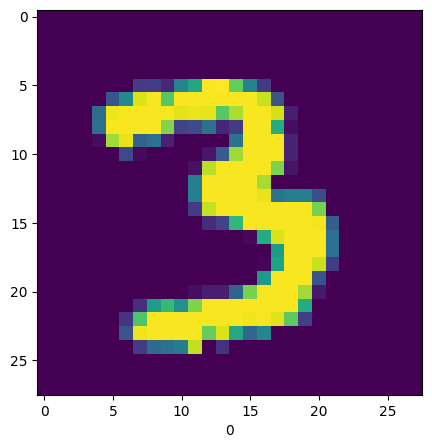

In [ ]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
